### Effects of diamond caracteristics on their prices
##### Pratique 2 : Prédiction de prix de diamant 

nous aurons 4 caractéristtique

- cara : poid
- niveau :
- couleur : 
- Niveau de clarté :

Les données étaient constitué des prix et des attributs d'environ 


Faire une exploration visuelle : utilisée pour repondre aux questions :


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#pour permettre d'afficher le graphique dans la même notebook*
%matplotlib inline 




In [14]:
data = pd.read_csv('diamonds.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
data.shape

(53940, 10)

In [16]:
data.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
#pour que panda traite les variables catégorique il faut le lui faire savoir
data.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [18]:
data.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [19]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [20]:
data.columns = ['poids', 'coupe', 'couleur', 'clarte', 'profondeur', 'table', 'prix', 'x', 'y','z']

In [21]:
#A voir : les dictionnaires

ordinal_var_dict = {
    'coupe':['Fair','Good','Very Good','Premium', 'Ideal'],
    'couleur':['J','I','H','G','F','E','D'],
    'clarte': ['I1','SI2','SI1','VS2','VS1','WS2']
}

## Data clean

In [27]:
data_clean = pd.read_csv('diamonds_clean.csv')
data_clean.head(60)

,poids,coupe,couleur,clarte,profondeur,table,prix,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [28]:
data_clean.shape

(53901, 10)

In [35]:
data_clean.loc[data_clean['coupe'] == 'Very Good'].head()


,poids,coupe,couleur,clarte,profondeur,table,prix,x,y,z
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
19,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66


In [36]:
data_clean.head()

,poids,coupe,couleur,clarte,profondeur,table,prix,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
data_clean.profondeur.unique()
max = data_clean.profondeur.max()
min = data_clean.profondeur.min()
print('min = ', min, ' max = ', max)

min =  50.8  max =  79.0


Questions :

1. Pour un diamant d'une profondeur variant entre 57,0 et 61,0 quelle est la plage de prix la plus élévée si la coupe est de qualité premium.
2. Quelle coupe a le prix le plus élévé pour la profondeur la plus élévé ?
3. Sous quelle plage de valeurs se trouve chaque coupe de diamant pour la profondeur maximale et le poids minimal ?
4. Quelle proportion de diamant ayant la profondeur nageant entre 57 à 60 ?
5. Quelle couleur de diamant coûte cher ?

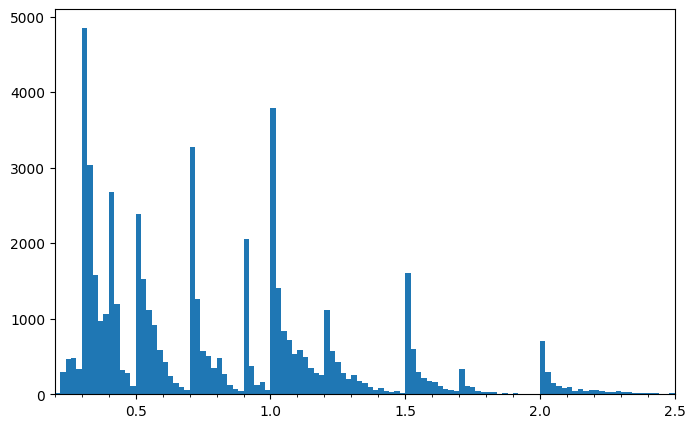

In [41]:
#Distribution de poids 
binsize = 0.02
bins = np.arange(0.2,2.5 + binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data = data_clean, x = 'poids', bins = bins)
plt.xlim([0.2,2.5])
plt.xlabel = 'poids'
plt.gca().set_xticks(np.arange(0.2,2.5,0.1),minor=True)




<function matplotlib.pyplot.show(close=None, block=None)>

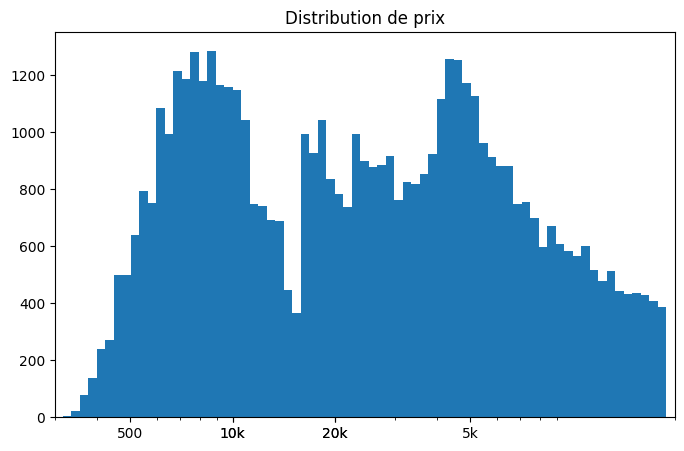

In [ ]:
#Distribution de poids 
log_binsize = 0.025
bins = 10 ** np.arange(2.4,np.log10(data_clean['prix'].max()) + log_binsize, log_binsize)
plt.figure(figsize=[8,5])
plt.hist(data = data_clean, x = 'prix', bins = bins)
plt.title('Distribution de prix')

plt.xscale('log')
plt.xlim([300, 2e4])
plt.xticks([500,1e3,2e3,5e3,1e3,2e3],['500','1k','2k','5k','10k','20k'])
plt.xlabel = 'prix $'
plt.show





In [56]:
#Reponse à la question 5 :
data.groupby(data['couleur'])['prix'].max()

couleur
D    18693
E    18731
F    18791
G    18818
H    18803
I    18823
J    18710
Name: prix, dtype: int64

1. Pour un diamant d'une profondeur variant entre 57,0 et 61,0 quelle est la plage de prix la plus élévée si la coupe est de qualité premium.
2. Quelle coupe a le prix le plus élévé pour la profondeur la plus élévé ?
3. Sous quelle plage de valeurs se trouve chaque coupe de diamant pour la profondeur maximale et le poids minimal ?
4. Quelle proportion de diamant ayant la profondeur nageant entre 57 à 60 ?
5. Quelle couleur de diamant coûte cher ?

In [58]:
#Question 1
#Filtrage profondeur entre 57 et et coupe premium

Filtre_profondeur = data_clean[(data_clean['profondeur'] >= 57.0) 
            & (data_clean['profondeur'] <= 61.0)
            & (data_clean['coupe']== 'Premium')]
Filtre_profondeur

,poids,coupe,couleur,clarte,profondeur,table,prix,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
54,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31
...,...,...,...,...,...,...,...,...,...,...
53872,0.57,Premium,E,IF,59.8,60.0,2753,5.43,5.38,3.23
53879,0.76,Premium,I,VS1,59.3,62.0,2753,5.93,5.85,3.49
53891,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53892,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [61]:
#Affichage prix élévé
prix_max = Filtre_profondeur['prix'].max()
print('Le prix le plus élévé est : ',prix_max)

Le prix le plus élévé est :  18823


2. Quelle coupe a le prix le plus élévé pour la profondeur la plus élévé ?

In [63]:
# Profondeur max
max_pro = data_clean['profondeur'].max()
max_pro

np.float64(79.0)

In [64]:
#prondeur max donnee
data_max_profond = data_clean[data_clean['profondeur']== max_pro]
data_max_profond

,poids,coupe,couleur,clarte,profondeur,table,prix,x,y,z
52821,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52822,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [65]:
#Prix max par coupe
data_max_profond_coupe = data_max_profond.groupby('coupe')['prix'].max().sort_values(ascending = False)

In [66]:
data_max_profond_coupe

coupe
Fair    2579
Name: prix, dtype: int64